<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# Convolutional Neural Networks for Image Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

2025-04-09 16:25:25.428135: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-09 16:25:25.472790: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744208725.502052  415945 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744208725.508918  415945 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-09 16:25:25.571024: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

##  Visualizing the Image Data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[1]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
single_image.shape

(28, 28)

(28, 28, 1)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 25

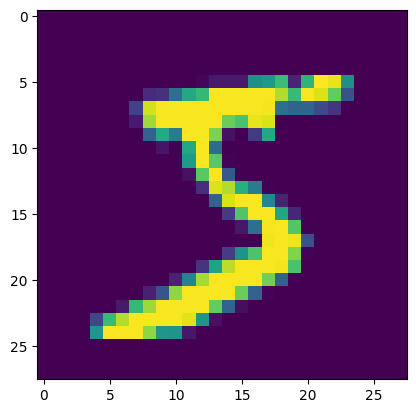

In [8]:
single_image_plus_color_channel = single_image.reshape(28, 28, 1)
print(single_image_plus_color_channel.shape)
plt.imshow(single_image_plus_color_channel, cmap="viridis")
print(single_image_plus_color_channel[:,:,0])

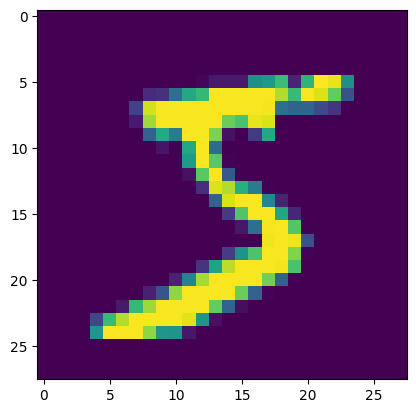

In [9]:
plt.imshow(single_image, cmap="viridis")

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

## Labels

In [10]:
print(repr(y_train))
print(repr(y_test))

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)
array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)


In [16]:
# Dit kan ook
import tensorflow as tf
from tensorflow.keras import layers

m1 = tf.keras.Sequential(name="EEN")
print(type(m1), repr(m1))


<class 'keras.src.models.sequential.Sequential'> <Sequential name=EEN, built=False>


A <class 'keras.src.models.sequential.Sequential'> <Sequential name=resize_and_scale, built=False>
B <class 'tensorflow.python.framework.ops.EagerTensor'> (28, 28, 1)
C Min and Max values in image min:(0.0), max:(1.0)
tf.Tensor(
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.19215688]
 [0.9333334 ]
 [0.9921569 ]
 [0.9921569 ]
 [0.9921569 ]
 [0.9921569 ]
 [0.9921569 ]
 [0.9921569 ]
 [0.9921569 ]
 [0.9921569 ]
 [0.9843138 ]
 [0.3647059 ]
 [0.32156864]
 [0.32156864]
 [0.21960786]
 [0.15294118]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]], shape=(28, 1), dtype=float32)


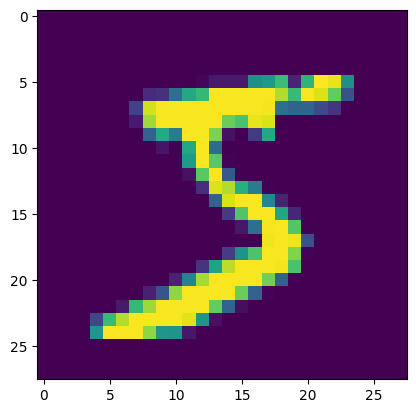

In [26]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

IMG_SIZE = 28

# Use a sequential model
resize_and_scale = models.Sequential(name="resize_and_scale")
print("A", type(resize_and_scale), repr(resize_and_scale))

# Preprocessing layer(s)
resize_and_scale.add(layers.Resizing(IMG_SIZE, IMG_SIZE))
resize_and_scale.add(layers.Rescaling(scale=1.0/255., offset=0.0))
image_resized = resize_and_scale(single_image_plus_color_channel)
print("B", type(image_resized), image_resized.shape)
print("C", f"Min and Max values in image min:({image_resized.numpy().min()}), max:({image_resized.numpy().max()})")
plt.imshow(image_resized.numpy(), cmap="viridis")
print(image_resized[7])

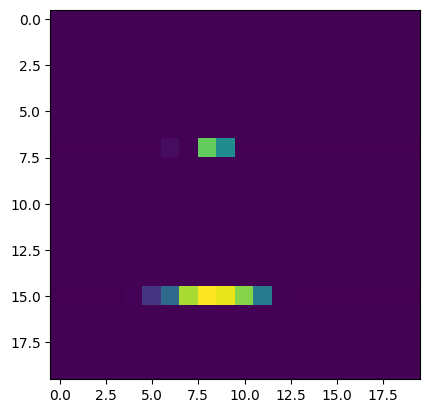

In [20]:
image_horizontal_line = np.ones((20,20,1))
# print(repr(image_horizontal_line))
image_horizontal_line[7] = image_resized[7]
image_horizontal_line[15] = image_resized[15]
plt.imshow(image_horizontal_line, cmap="viridis")

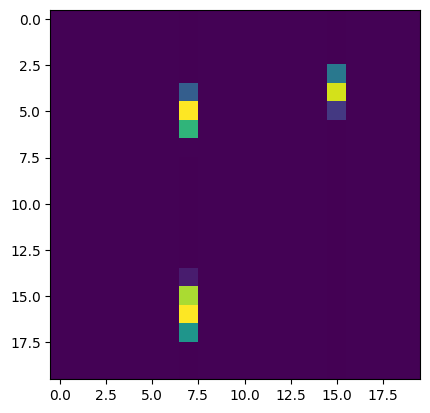

In [21]:
image_vertical_line = np.ones((20,20,1))
# print(repr(image_vertical_line))
image_vertical_line[:,7] = image_resized[:,7]
image_vertical_line[:,15] = image_resized[:,15]
plt.imshow(image_vertical_line, cmap="viridis")

Hmmm, looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [49]:
from tensorflow.keras.utils import to_categorical

In [50]:
y_train.shape

(60000,)

In [51]:
y_example = to_categorical(y_train)

In [52]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [53]:
y_example.shape

(60000, 10)

In [54]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [55]:
y_cat_test = to_categorical(y_test,10)  # explicitly define the number of classes

In [56]:
y_cat_train = to_categorical(y_train,10)

### Processing X Data

We should normalize the X data

In [57]:
single_image.max()

np.uint8(255)

In [58]:
single_image.min()

np.uint8(0)

In [59]:
x_train = x_train/255
x_test = x_test/255

In [60]:
scaled_single = x_train[0]

In [61]:
scaled_single.max()

np.float64(1.0)

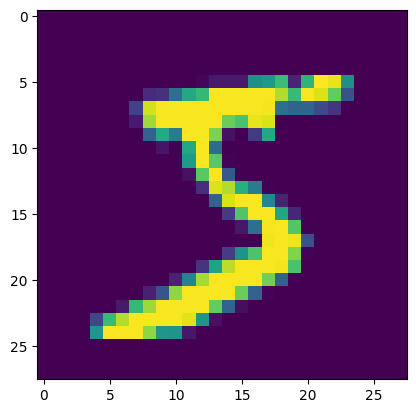

In [62]:
plt.imshow(scaled_single)

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [63]:
print(x_train.shape)
x_train[0]

(60000, 28, 28)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [64]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [65]:
# batch size (all images), width, height, color_channels 
x_train = x_train.reshape(60000, 28, 28, 1)

In [67]:
print(x_train.shape)
x_train[0]

(60000, 28, 28, 1)


array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [37]:
x_test = x_test.reshape(10000,28,28,1)

In [38]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
x_train

# Training the Model

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [85]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/
model

<Sequential name=sequential_5, built=True>

In [86]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [87]:
from tensorflow.keras.callbacks import EarlyStopping

In [88]:
early_stop = EarlyStopping(monitor='val_loss',patience=2, verbose=1)

## Train the Model

In [89]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9060 - loss: 0.3080 - val_accuracy: 0.9803 - val_loss: 0.0563
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9844 - loss: 0.0491 - val_accuracy: 0.9772 - val_loss: 0.0683
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9903 - loss: 0.0301 - val_accuracy: 0.9869 - val_loss: 0.0397
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9929 - loss: 0.0218 - val_accuracy: 0.9835 - val_loss: 0.0534
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9949 - loss: 0.0153 - val_accuracy: 0.9874 - val_loss: 0.0384
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9966 - loss: 0.0107 - val_accuracy: 0.9864 - val_loss: 0.0494
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9977 - loss: 0.0077 - val_accuracy: 0.9843 - val_loss: 0.0561
Epoch 7: early stopping


## Evaluate the Model

In [93]:
print(model.metrics_names)
print(type(model.history.history))
print(model.history.history.keys())

['loss', 'compile_metrics']
<class 'dict'>
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [94]:
losses = pd.DataFrame(model.history.history)

In [95]:
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.955867,0.147364,0.9803,0.056286
1,0.984267,0.050096,0.9772,0.068309
2,0.989517,0.033555,0.9869,0.039653
3,0.992050,0.023439,0.9835,0.053443
4,0.994467,0.016608,0.9874,0.038370


<Axes: >

<Figure size 1200x800 with 0 Axes>

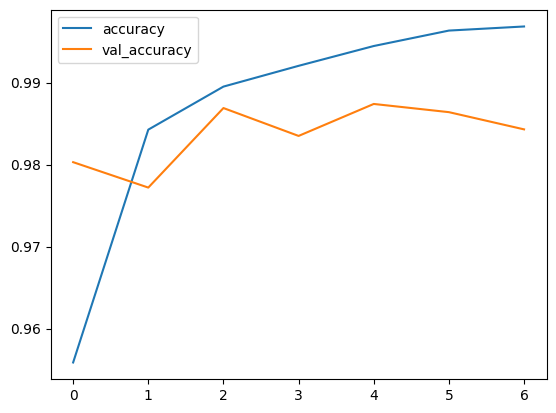

In [109]:
plt.figure(figsize=(12,8))
losses[['accuracy','val_accuracy']].plot(kind='line')

<Axes: >

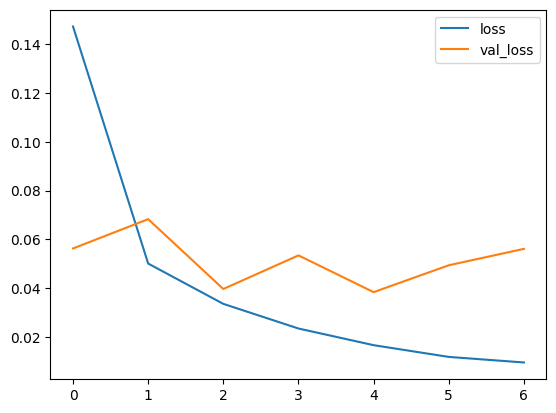

In [110]:
losses[['loss','val_loss']].plot()

<Axes: >

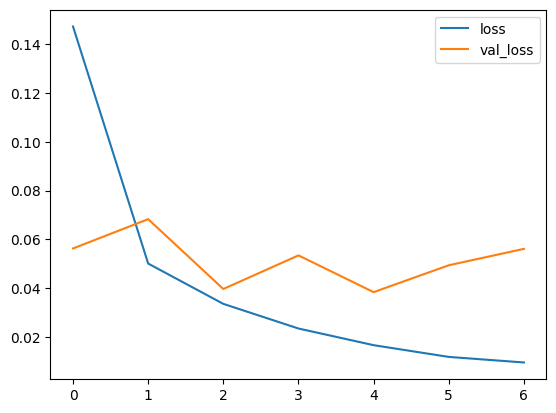

In [111]:
losses[['loss','val_loss']].plot()

In [127]:
print(model.metrics_names)
print(model.metrics)
xx=model.evaluate(x_test,y_cat_test,verbose=1, return_dict=True)
print(type(xx))
print(xx)
      

['loss', 'compile_metrics']
[<Mean name=loss>, <CompileMetrics name=compile_metrics>]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9807 - loss: 0.0682
<class 'dict'>
{'accuracy': 0.9843000173568726, 'loss': 0.05612252652645111}


In [128]:
from sklearn.metrics import classification_report,confusion_matrix

In [176]:
predictions = model.predict(x_test)
print(x_test.shape)
print(x_test[0])
predictions = model.predict(x_test[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.       

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

In [130]:
y_cat_test.shape

(10000, 10)

In [139]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [140]:
predictions[0]

array([7.5296898e-09, 2.6426342e-10, 3.4828354e-08, 2.1218304e-05,
       9.2546344e-12, 4.0057975e-09, 1.2872611e-14, 9.9994135e-01,
       1.1042782e-08, 3.7382895e-05], dtype=float32)

In [145]:
cat_predictions = np.argmax(predictions, axis=1)
cat_predictions

array([7, 2, 1, ..., 4, 5, 6])

In [146]:
cat_predictions.shape

(10000,)

In [148]:
print(y_test.shape)
y_test

(10000,)


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [149]:
print(classification_report(y_test,cat_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       1.00      0.95      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.96      0.99      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [150]:
confusion_matrix(y_test,cat_predictions)

array([[ 974,    0,    0,    1,    0,    0,    3,    0,    2,    0],
       [   0, 1133,    0,    0,    0,    0,    1,    0,    0,    1],
       [   2,    3, 1009,    7,    0,    0,    1,    3,    6,    1],
       [   0,    0,    3, 1001,    0,    4,    0,    0,    2,    0],
       [   0,    0,    0,    0,  966,    0,    5,    0,    2,    9],
       [   1,    0,    0,    8,    0,  878,    1,    0,    3,    1],
       [   3,    3,    0,    1,    1,    3,  943,    0,    4,    0],
       [   0,    7,   13,    4,    0,    0,    0,  981,    1,   22],
       [   1,    1,    1,    3,    0,    0,    0,    0,  964,    4],
       [   1,    1,    0,    3,    3,    4,    0,    0,    3,  994]])

In [151]:
import seaborn as sns

<Axes: >

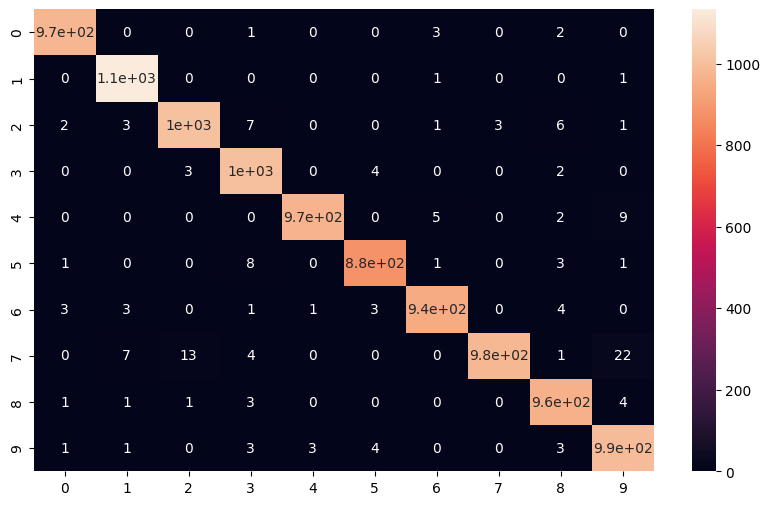

In [153]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,cat_predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [182]:
my_numbers = x_test[0:2]
print(x_test.shape)
print(my_numbers.reshape(2,28,28,1))

(10000, 28, 28)
[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]]


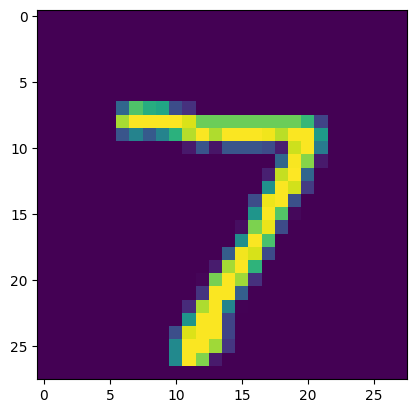

In [185]:
plt.imshow(my_numbers[0].reshape(28,28))

In [186]:
print(my_numbers.shape)
print(x_test.shape)

(2, 28, 28)
(10000, 28, 28)


In [188]:
# SHAPE --> (num_images,width,height,color_channels)
my_number_predictions = model.predict(my_numbers)
print(my_number_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[7.5233153e-09 2.6422103e-10 3.4926874e-08 2.1237940e-05 9.2621908e-12
  4.0078607e-09 1.2843768e-14 9.9994123e-01 1.1055172e-08 3.7396403e-05]
 [1.0879958e-11 5.8273120e-08 1.0000000e+00 2.5845322e-12 2.8922357e-17
  4.5896253e-18 1.0688030e-12 2.3777670e-14 8.8966674e-11 7.6715994e-15]]


In [195]:
my_number_cat_predictions = np.argmax(my_number_predictions, axis=0)
print(my_number_cat_predictions)

[0 1 1 0 0 0 1 0 0 0]


Looks like the CNN performed quite well!